## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

Ejemplo tomado de la documentación de la librería *MiniSom*, https://github.com/JustGlowing/minisom.

In this example we will see how to use MiniSom to draw some insights from the <a href="https://en.wikipedia.org/wiki/Democracy_Index">Democracy Index data</a> from Wikipedia.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale

In [2]:
df = sns.load_dataset('penguins') 

In [3]:
df = df.dropna()

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

As we can see the dataset contains a set of of social metrics related to the democracy level for each country. The goal is to use these metrics as features for our SOM so that we can create a bidimensional space where each country is mapped according to their democracity level.

Let's define a set of color for the categories in which the countries are classified and also a country codes for each country. These will become handy when we will visualize the results on the map.

In [6]:
category_color = {'Adelie': 'darkgreen',
                  'Gentoo': 'blue',
                  'Chinstrap': 'red'}

colors_dict = {c: category_color[dm] for c, dm in zip(df.index,
                                                      df.species)}

We are now ready 1) isolate our features, 2) scale the feature and train our SOM:

In [7]:
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = df[feature_names].values
X = scale(X)

size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2906362390713785


### Results

In [8]:
som.activation_response(X)

array([[1., 0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 1., 1., 2., 1.],
       [2., 2., 0., 0., 0., 0., 0., 0., 2., 1., 3., 1., 1., 3., 0.],
       [1., 2., 1., 0., 0., 0., 0., 0., 0., 3., 1., 1., 1., 1., 3.],
       [2., 3., 1., 2., 0., 0., 1., 2., 0., 0., 1., 1., 2., 2., 3.],
       [4., 0., 2., 2., 0., 0., 1., 4., 0., 3., 1., 3., 4., 4., 4.],
       [3., 2., 2., 3., 1., 1., 0., 3., 2., 2., 2., 1., 0., 2., 2.],
       [3., 1., 3., 2., 1., 0., 3., 3., 4., 2., 3., 2., 0., 0., 4.],
       [2., 1., 2., 3., 1., 0., 3., 2., 2., 2., 2., 2., 2., 0., 2.],
       [4., 2., 2., 2., 4., 0., 4., 2., 1., 4., 2., 3., 3., 2., 2.],
       [1., 3., 1., 2., 2., 0., 2., 2., 4., 1., 1., 2., 1., 0., 1.],
       [2., 3., 2., 1., 1., 0., 0., 1., 1., 2., 1., 2., 2., 2., 3.],
       [4., 1., 2., 1., 2., 0., 2., 3., 1., 1., 1., 0., 1., 2., 1.],
       [3., 1., 4., 1., 1., 0., 0., 3., 1., 2., 3., 1., 1., 0., 2.],
       [2., 3., 1., 1., 0., 1., 2., 1., 1., 1., 0., 1., 0., 1., 1.],
       [2., 2., 0., 1., 0., 0., 2.

A social map of penguins
----

Here we will plot each country in a cell that represent the winning neuron on the SOM. The country codes will be used instead of the full names of the countries to make the map more readable. The name of the countries will be colored according to their democracy status.

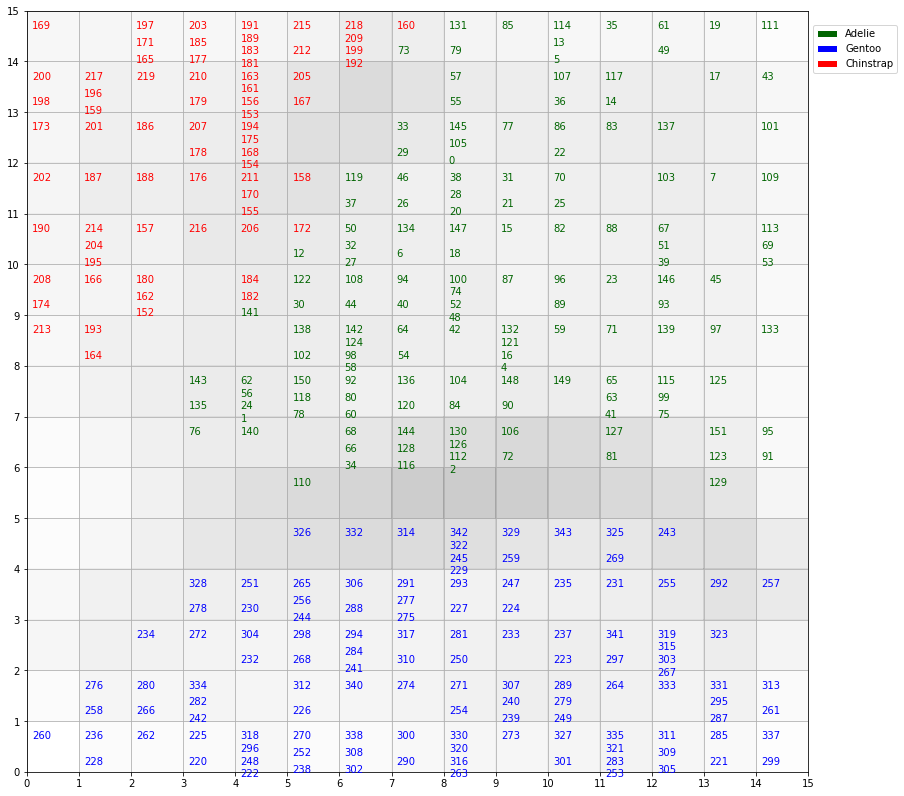

In [9]:
mapp = som.labels_map(X, df.index)
    
plt.figure(figsize=(14, 14))
for p, idx in mapp.items():
    idx = list(idx)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(idx):
        off_set = (i+1)/len(idx) - 0.05
        plt.text(x, y+off_set, c, color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

Features planes
----

Here we will create a map for each feature used that reflects the magnitude of the weights associated to it for each neuron.

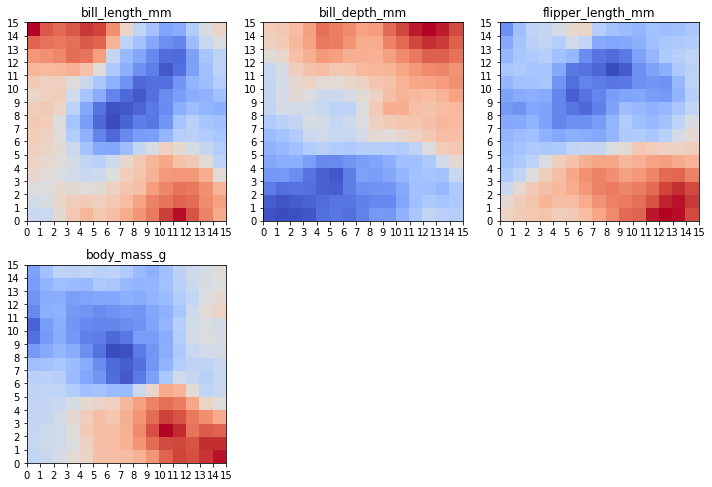

In [10]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap=plt.cm.coolwarm)
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

Most relevant feature plane
----

In this map we associate each neuron to the feature with the maximum weight. This segments our map in regions where specific features have high values.

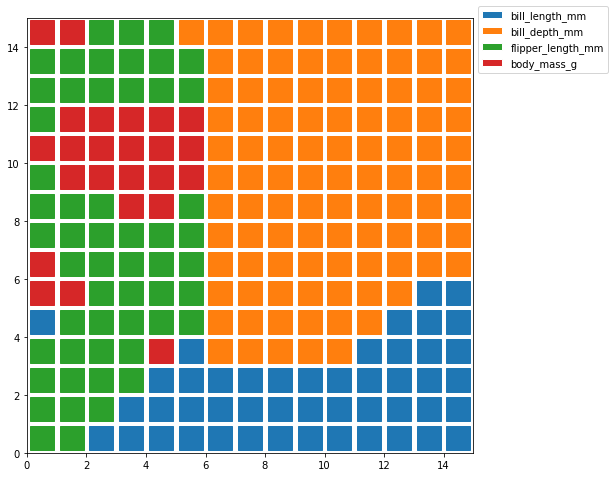

In [11]:
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()